- **Purpose:** Follow the codes in chapter 5
- **Date:** July 25, 2025

# 1. Libraries and data

In [1]:
# Load libraries
library(tidyverse)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Reticulate
install.packages("reticulate")
library(reticulate)
py_require("kagglehub")
kgh <- import("kagglehub")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’




In [3]:
# Read the dataframe
path <- kgh$dataset_download("ashydv/advertising-dataset")
advert_df <- read_csv(paste0(path, "/advertising.csv"))
head(advert_df)

Rows: 200 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): TV, Radio, Newspaper, Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2


# 2. Fit the linear model

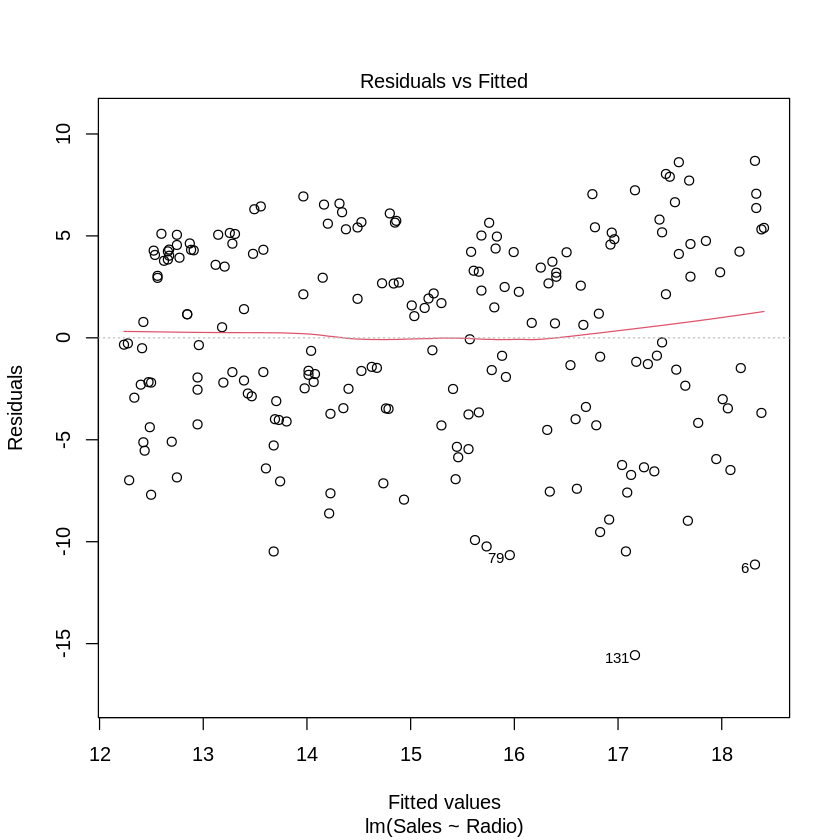

In [4]:
# Fit the model
radio_lm <- lm(Sales ~ Radio, data=advert_df)
plot(radio_lm, which=1)

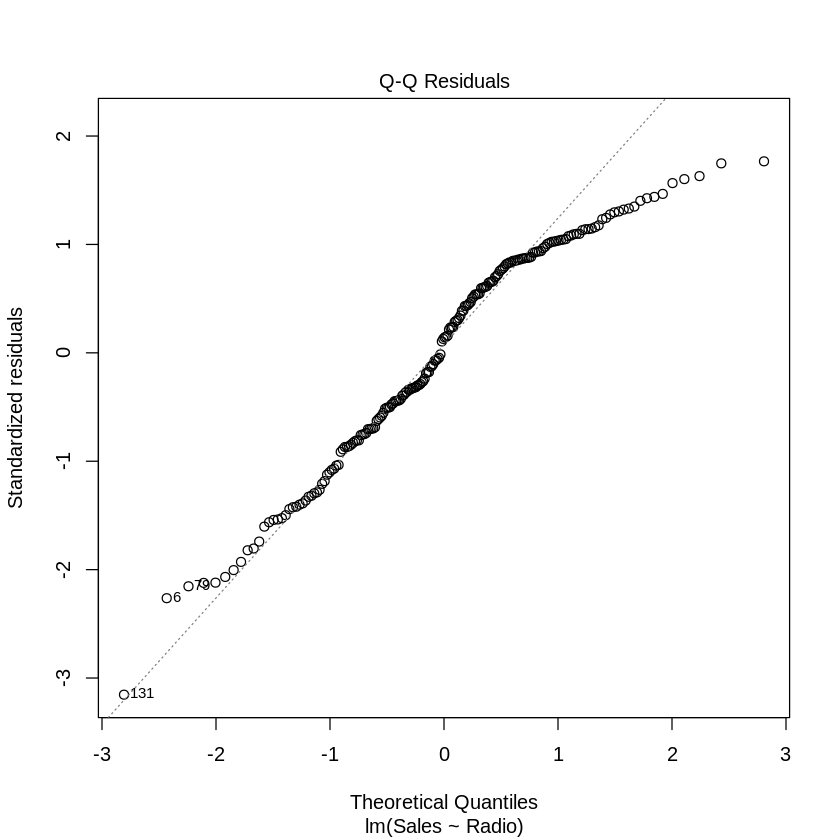

In [5]:
# q-q plot
plot(radio_lm, which=2)

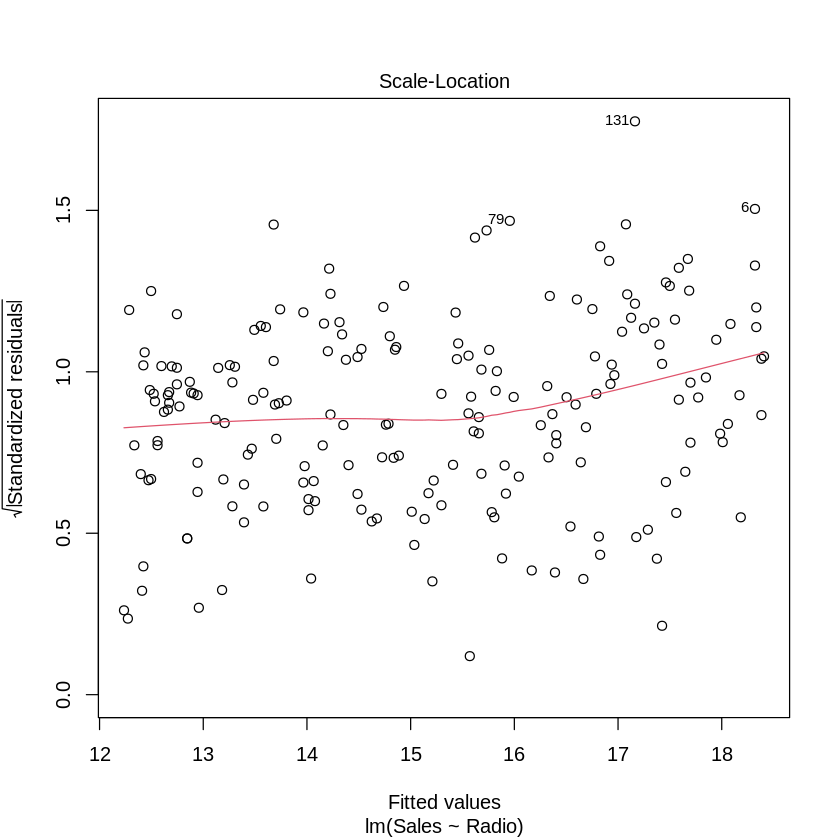

In [6]:
# scale-location
plot(radio_lm, which=3)

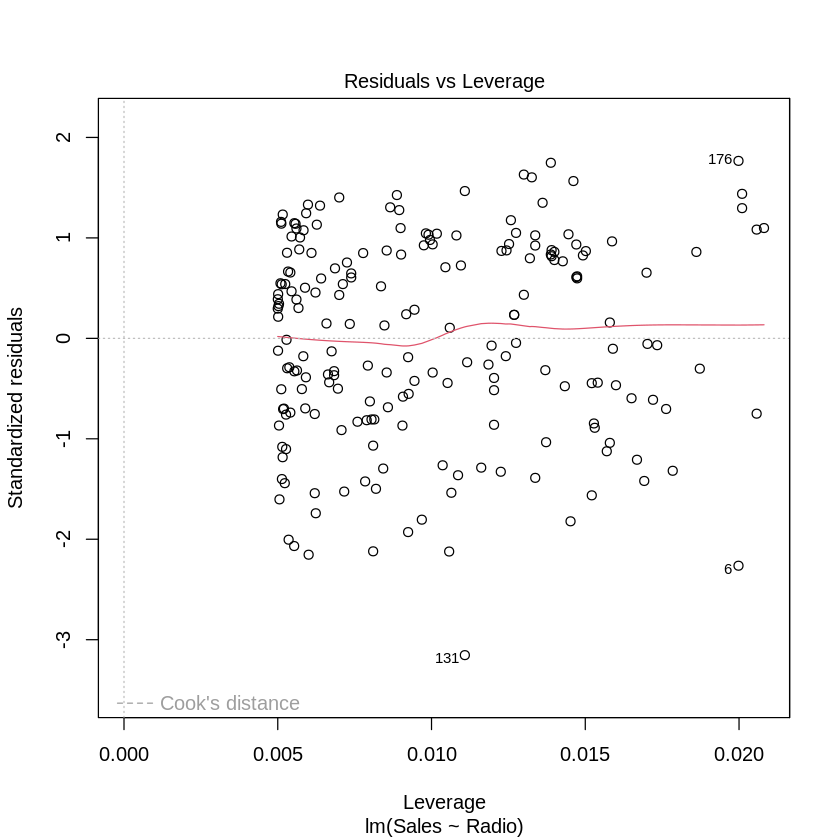

In [8]:
# residuals vs leverage
plot(radio_lm, which=5)

Undersating the concept of leverage would require a knowledge of **hat matrix**.
In general, The leverage of an observation measures how much it has an impact on the fitted value


# 3. Multiple predictors

In [9]:
# Fit all predictions
complete_lm <- lm(Sales ~ ., data=advert_df)
summary(complete_lm)


Call:
lm(formula = Sales ~ ., data = advert_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3034 -0.8244 -0.0008  0.8976  3.7473 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.6251241  0.3075012  15.041   <2e-16 ***
TV          0.0544458  0.0013752  39.592   <2e-16 ***
Radio       0.1070012  0.0084896  12.604   <2e-16 ***
Newspaper   0.0003357  0.0057881   0.058    0.954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.662 on 196 degrees of freedom
Multiple R-squared:  0.9026,	Adjusted R-squared:  0.9011 
F-statistic: 605.4 on 3 and 196 DF,  p-value: < 2.2e-16


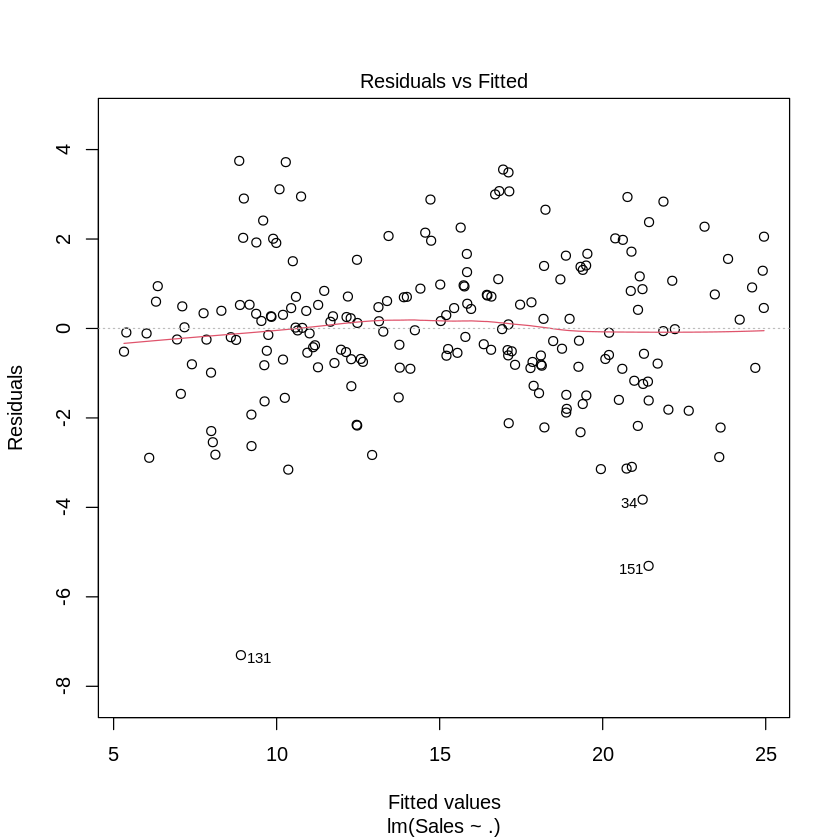

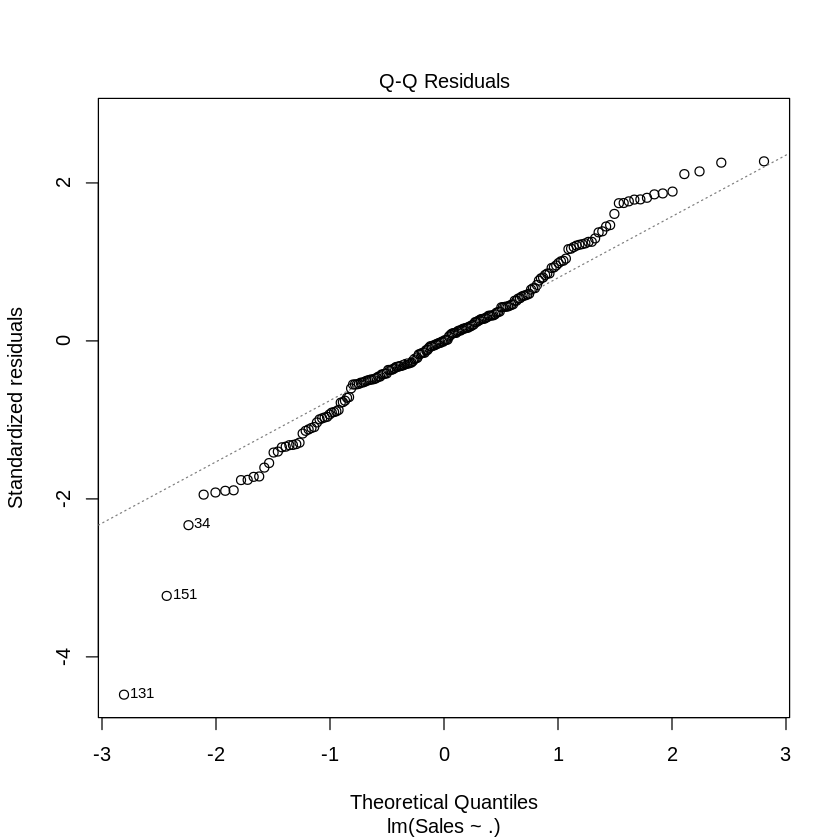

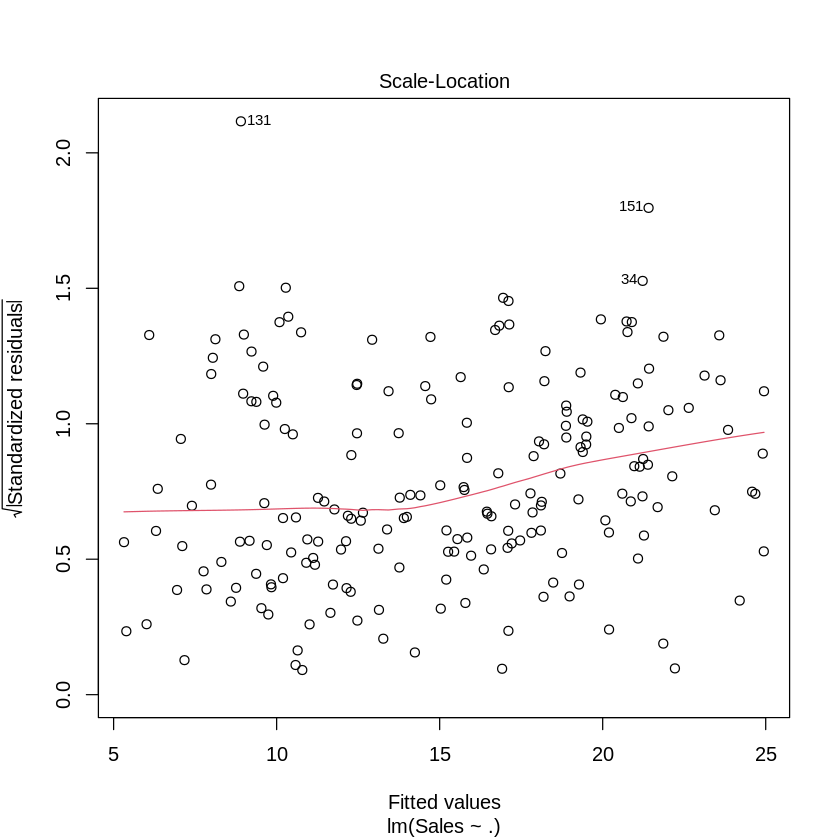

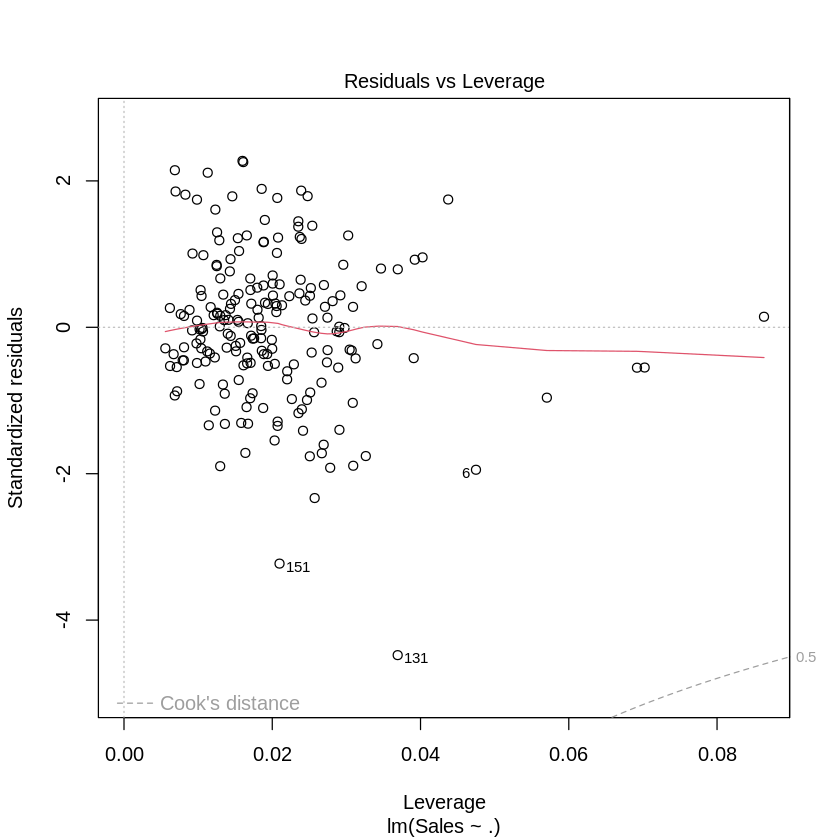

In [10]:
# Plot the model
plot(complete_lm)

# 4. Confint interval

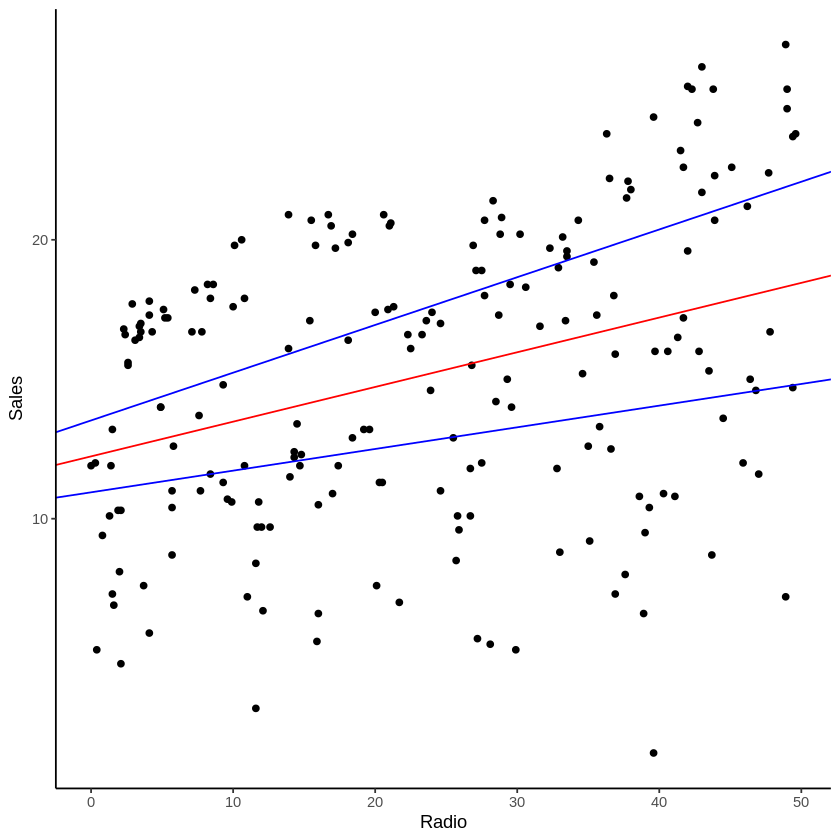

In [12]:
# Visualizing the conf interval
lb <- confint(radio_lm)[, 1] # lower bound
ub <- confint(radio_lm)[, 2] # upper bound

radio_lm |>
  ggplot(aes(Radio, Sales)) +
  geom_point() +
  geom_abline(intercept= radio_lm$coefficients[[1]],
              slope=radio_lm$coefficients[[2]], color="red") +
  geom_abline(intercept=lb[1], slope=lb[2], color="blue") +
  geom_abline(intercept=ub[1], slope=ub[2], color="blue") +
  theme_classic()

In [23]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] reticulate_1.43.0 lubridate_1.9.4   forcats_1.0.0     stringr_1.5.1    
 [5] dplyr_1.1.4       purrr_1.1.0       readr_2.1.5       tidyr_1.3.1      
 [9] tibble_3.3.0      gg